## 加载包

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

下载到的一些youtube视频话题下的评论，其中分为了垃圾评论和正常评论

## 读取数据

In [2]:
df1=pd.read_csv('C:/users/yuki/Desktop/朴素贝叶斯/YouTube-Spam-Collection-v1/Youtube01-Psy.csv')
df2=pd.read_csv('C:/users/yuki/Desktop/朴素贝叶斯/YouTube-Spam-Collection-v1/Youtube02-KatyPerry.csv')
df3=pd.read_csv('C:/users/yuki/Desktop/朴素贝叶斯/YouTube-Spam-Collection-v1/Youtube03-LMFAO.csv')
df4=pd.read_csv('C:/users/yuki/Desktop/朴素贝叶斯/YouTube-Spam-Collection-v1/Youtube04-Eminem.csv')
df5=pd.read_csv('C:/users/yuki/Desktop/朴素贝叶斯/YouTube-Spam-Collection-v1/Youtube05-Shakira.csv')

## 数据预处理

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
#观察数据shape，同样的shape

(350, 5)
(350, 5)
(438, 5)
(448, 5)
(370, 5)


In [4]:
df1.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [5]:
#把所有数据拼接在一起，同时通过对数据的观察得出，class为1的content是垃圾content
df_all=pd.concat([df1,df2,df3,df4,df5])
#重置一下新组合成的数据框的index
df_all=df_all.reset_index()

In [6]:
df_all[df_all['CLASS']==1]

,index,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...,...
1943,357,_2viQ_Qnc6_HU65mTzCmXnjA-WLt7XqxqPj7EwAtlO0,ricky swaggz,2013-07-14T20:40:00.331000,********OMG Facebook is OLD! Check out ------...,1
1944,358,_2viQ_Qnc6-jk58CPwBnqfbM6oByJH5oPvCtKecLQyo,Shadrach Grentz,2013-07-14T03:11:20.243000,Hey Music Fans I really appreciate all of you ...,1
1945,359,_2viQ_Qnc6_fgKR1W7-k1lbVURi8hVbMlQAMSOCSnyk,ThirdDegr3e,2013-07-13T20:48:22.967000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1
1946,360,_2viQ_Qnc69MEEHHJxZ427KX8MlljJPnUC2YBbvbWwY,ThirdDegr3e,2013-07-13T20:48:06.033000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1


In [7]:
#comment id应该是随机生成的，date也是只是发表评论的时间
#删除无关数据
df_next=df_all.drop(columns=['index','COMMENT_ID','DATE'])

In [8]:
df_next

,AUTHOR,CONTENT,CLASS
0,Julius NM,"Huh, anyway check out this you[tube] channel: ...",1
1,adam riyati,Hey guys check out my new channel and our firs...,1
2,Evgeny Murashkin,just for test I have to say murdev.com,1
3,ElNino Melendez,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,GsMega,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...
1951,Katie Mettam,I love this song because we sing it at Camp al...,0
1952,Sabina Pearson-Smith,I love this song for two reasons: 1.it is abou...,0
1953,jeffrey jules,wow,0
1954,Aishlin Maciel,Shakira u are so wiredo,0


In [9]:
text=list(df_next['CONTENT'].values)

In [10]:
text

['Huh, anyway check out this you[tube] channel: kobyoshi02',
 "Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!",
 'just for test I have to say murdev.com',
 'me shaking my sexy ass on my channel enjoy ^_^ \ufeff',
 'watch?v=vtaRGgvGtWQ   Check this out .\ufeff',
 'Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com',
 'Subscribe to my channel \ufeff',
 'i turned it on mute as soon is i came on i just wanted to check the  views...\ufeff',
 'You should check my channel for Funny VIDEOS!!\ufeff',
 'and u should.d check my channel and tell me what I should do next!\ufeff',
 'Hey subscribe to me\ufeff',
 " Once you have started reading do not stop. If you do not subscribe to me  within one day you and you're entire family will die so if you want to stay  alive subscribe right now.\ufeff",
 'https://twitter.com/GBphotographyGB\ufeff',
 'subscri

In [12]:
#导入nltk库 告诉nltk库安装的包的位置便于查找
import nltk
nltk.data.path.append('D:/nltk_data/')

## 文本处理

In [15]:
test=pd.DataFrame(text,columns=['text'])
#字母转化为小写
test['text']=test.text.map(lambda x:x.lower())
#去掉各种符号
#正则表达式 替换除了 字母数字下划线、任意空白字符以外的字符 为空
test['text']=test.text.str.replace('[^\w\s]','')

#将评论分词
test['text']=test.text.apply(nltk.word_tokenize)

#词干提取，把词从不同的时态变换成标准形式
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
test['text']=test.text.apply(lambda x:[stemmer.stem(y) for y in x])

#删除停用词
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

for index in range(0,len(test)):
    temp=[]
    for word in test.text[index]:
        if word not in stop_words:
            temp.append(word)
    test.text[index]=temp

In [16]:
#删除所有 经过处理后text变为空的列
drop=[]
for index in range(0,len(test)):
    if len(test.text[index])==0:
        drop.append(index)

test=test.drop(index=drop)
df_next=df_next.drop(index=drop)

In [17]:
test=test.reset_index()
df_next=df_next.reset_index()

## 向量化

In [18]:
#TF-IDF
#分词后首先制作这些评论的语料库
lst=[]
for j in test.text:
    for i in j:
        lst.append(i)
word_corpus=set(lst)

In [19]:
import copy
numofWords_df=copy.deepcopy(test)

for index in range(0,len(test)):
    numofWords=dict.fromkeys(word_corpus,0)
    for word in test.text[index]:
        numofWords[word]+=1
    numofWords_df.text[index]=numofWords

<ipython-input-19-ad6da4f1ba9e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numofWords_df.text[index]=numofWords


In [20]:
#功能：计算词典中所有字符串的TF
def computeTF(wordDict,word_list):
    tfDict={}
    word_count=len(word_list)
    for word,count in wordDict.items():
        tfDict[word]=count/float(word_count)
    return tfDict

#功能：计算词典中所有字符串的IDF
def computeIDF(documents):
    import math
    N=len(documents)
    
    idfDict=dict.fromkeys(documents[0].keys(),0)
    for document in documents:
        for word,val in document.items():
            if val>0:
                idfDict[word]+=1
    for word,val in idfDict.items():
        idfDict[word]=math.log(N/float(val))
    return idfDict

#功能：计算词典中所有字符串的TFIDF
def computeTFIDF(tf,idfs):
    tfidf={}
    for word,val in tf.items():
        tfidf[word]=val*idfs[word]
    return tfidf

In [21]:
numofWords_df['tf']=''

In [22]:
#计算tf
for index in range(0,len(numofWords_df)):
    numofWords_df.tf[index]=computeTF(numofWords_df.text[index],test.text[index])

#每条评论当作一个文档，计算idfs    
allwords_list=list(numofWords_df.text.values)
idfs=computeIDF(allwords_list)

numofWords_df['tfidf']=''

#利用计算出的tf和idfs计算最终的tfidfs
for index in range(0,len(numofWords_df)):
    tfidf_temp=computeTFIDF(numofWords_df.tf[index],idfs)
    numofWords_df.tfidf[index]=tfidf_temp

<ipython-input-22-d2e28725a3e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numofWords_df.tf[index]=computeTF(numofWords_df.text[index],test.text[index])
<ipython-input-22-d2e28725a3e4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numofWords_df.tfidf[index]=tfidf_temp


## 模型预测

In [23]:
#把所有tfidfs数转成只有数字的列表
tfidf_lst=[]
for index in range(0,len(numofWords_df)):
    temp=list(numofWords_df.tfidf[index].values())
    tfidf_lst.append(temp)

In [24]:
tfidf_array=np.array(tfidf_lst)

In [41]:
#构建模型
#分训练集与测试
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(tfidf_array,df_next['CLASS'],test_size=0.3,random_state=113)

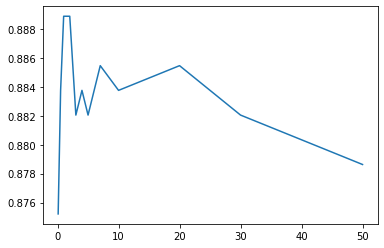

In [47]:
#class sklearn.naive_bayes.MultinominalNB(alpha=1.0, fit_prior=True, class_prior=None)
from sklearn.naive_bayes import MultinomialNB
alpha=[0.1,0.5,1,2,3,4,5,7,10,20,30,50]
score=[]
for a in alpha:
    model = MultinomialNB(alpha=a).fit(X_train, y_train) #构建模型,定义不同的平滑指数
    #建立模型预测测试集并输出得分变化图
    predicted=model.predict(X_test)
    score.append(np.mean(predicted==y_test))
    
plt.plot(alpha,score)

In [51]:
#取得分最大的平滑指数
alpha[score.index(max(score))]

1

In [52]:
model = MultinomialNB(alpha=1).fit(X_train, y_train) #构建模型,定义平滑指数
#建立模型预测测试集并输出得分
predicted=model.predict(X_test)

#观察混淆矩阵，可以看到错误的数量在正负类中都比较平衡
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))

[[235  30]
 [ 35 285]]


In [ ]:
'''
#不用正则表达式，使用多个函数对符号字符进行删除的方法

#去除除了数字字母以外的任何符号
#isalpha()+isnumeric()+join()
#遍历列表中的所有字符串
filtered_word=[]
for i in range(0,len(filtered_sentence)):
    temp_sentence=[]
    for j in range(0,len(filtered_sentence[i])):
        getVals=list([val for val in filtered_sentence[i][j] if val.isalpha() or val.isnumeric()])
        result=''.join(getVals)
        if result=='':
            continue
        else:
            temp_sentence.append(result)
    filtered_word.append(temp_sentence)
'''    

'''
#直接调用python自带的函数对字符串进行向量化处理，处理效果并没有手动写的TF-IDF方法好
#但是处理速度较快，占用内存较少

#把文本中的词语转换为词频矩阵，通过fit_transform函数计算出各个词语出现的个数
from sklearn.feature_extraction.text import CountVectorizer
test['text']=test.text.apply(lambda x:' '.join(x))
count_vect=CountVectorizer(stop_words=stop_words)
counts=count_vect.fit_transform(test['text'])

#统计出一个矩阵，每行都是每个text在所有出现的单词中一个编码，one-hot

#tf-idf
from sklearn.feature_extraction.text import TfidfTransformer
transformer=TfidfTransformer().fit(counts)
counts=transformer.transform(counts)'''